## 빅데이터 실습

### COVID19, 코로나 바이러스의 영향으로 중국인 관광객 얼마나 줄었을까?

#### 데이터 수집
- 한국관광고사, [한국관광 데이터랩](https://datalab.visitkorea.or.kr/datalab/portal/main/getMainForm.do)

#### 데이터 로드 및 전처리
- 분석적 중요한 단계
- Data Preprocessing : 분석에 적합하도록 원하는 형태로 데이터를 가공과정
  - 결측치 처리(None, Null, Nan) 처리, 이상치 처리, 변수 정규화, 파생변수 생성

#### 엑셀파일 로드


In [5]:
import pandas as pd

In [6]:
kto_201901 = pd.read_excel('./data/kto_201901.xlsx',header=1, usecols='A:G', skipfooter=4)
kto_201901

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570
...,...,...,...,...,...,...,...
62,아프리카 기타,768,718,90,206,908,2690
63,기타대륙,33,4,0,1,16,54
64,국적미상,33,4,0,1,16,54
65,교포소계,0,0,0,0,15526,15526


In [7]:
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570


In [8]:
kto_201901.tail()

,국적,관광,상용,공용,유학/연수,기타,계
62,아프리카 기타,768,718,90,206,908,2690
63,기타대륙,33,4,0,1,16,54
64,국적미상,33,4,0,1,16,54
65,교포소계,0,0,0,0,15526,15526
66,교포,0,0,0,0,15526,15526


In [9]:
# DF 각 정보개요
kto_201901.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [10]:
# DF의 각 통계치
kto_201901.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,26396.80597,408.208955,132.507463,477.462687,5564.208955,32979.194030
std,102954.04969,1416.040302,474.406339,2009.484800,17209.438418,122821.369969
min,0.00000,0.000000,0.000000,0.000000,16.000000,54.000000
25%,505.00000,14.500000,2.500000,17.500000,260.000000,927.000000
50%,1304.00000,45.000000,14.000000,43.000000,912.000000,2695.000000
75%,8365.00000,176.500000,38.000000,182.000000,2824.500000,14905.500000
max,765082.00000,10837.000000,2657.000000,14087.000000,125521.000000,916950.000000


In [11]:
# 한번도 한국에 방문학적이 없는 대륙, 나라(목적별)
condition = (kto_201901['관광']==0) | (kto_201901['상용']==0 )| (kto_201901['공용']==0)| (kto_201901['유학/연수']==0)|(kto_201901['기타']==0)
condition

0     False
1     False
2     False
3     False
4      True
      ...  
62    False
63     True
64     True
65     True
66     True
Length: 67, dtype: bool

In [12]:
kto_201901[condition]

,국적,관광,상용,공용,유학/연수,기타,계
4,마카오,2506,2,0,17,45,2570
20,이스라엘,727,12,0,9,57,805
22,우즈베키스탄,1958,561,0,407,2828,5754
38,스위스,613,18,0,19,97,747
45,그리스,481,17,4,0,273,775
46,포르투갈,416,14,0,13,121,564
51,크로아티아,226,12,0,3,250,491
54,폴란드,713,10,0,27,574,1324
59,대양주 기타,555,3,4,0,52,614
63,기타대륙,33,4,0,1,16,54


In [13]:
## cmap 판다스  DF 컬러맵
'''
'Accent', 'Accent_r', 'Blues', 'Blues_r', 
'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 
'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 
'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 
'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 
'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 
'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 
'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 
'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 
'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 
'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 
'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 
'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 
'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar',
'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 
'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r',
'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 
'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 
'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 
'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 
'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 
'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 
'terrain', 'terrain_r', 'turbo', 'turbo_r', 
'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'
'''
kto_201901[condition]
kto_201901.style.background_gradient(axis=None, vmin=0, vmax=200_000,cmap='gray')

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570
5,태국,34004,37,199,96,6998,41334
6,말레이시아,19043,95,7,99,2821,22065
7,필리핀,14279,211,161,184,15638,30473
8,인도네시아,14183,136,38,187,4298,18842
9,싱가포르,8372,94,8,48,1333,9855


In [14]:
## 기준년월 추가
kto_201901['기준년월'] = '2019-01'
kto_201901

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
...,...,...,...,...,...,...,...,...
62,아프리카 기타,768,718,90,206,908,2690,2019-01
63,기타대륙,33,4,0,1,16,54,2019-01
64,국적미상,33,4,0,1,16,54,2019-01
65,교포소계,0,0,0,0,15526,15526,2019-01


In [15]:
## 국적데이터만 추출
kto_201901['국적'].unique()

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [16]:
## 
for item in kto_201901['국적']:
    if item.strip()[-1] == '주':
        print(item)

아시아주
미주
구주
대양주
아프리카주


In [17]:
## 대륙 리스트
continent_list = ['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포소계']
continent_list

['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']

In [18]:
## 대륙을 뺀 국적리스트
condition=(kto_201901['국적'].isin(continent_list) == False)
kto_201901_countries = kto_201901[condition]
kto_201901_countries['국적'].unique()

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [19]:
## 중간 비는 인덱스없이 다시 시정, inplace=True 기존 데이터를 대체해줌
kto_201901_countries.reset_index(drop=True, inplace=True)
kto_201901_countries

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,일본,198805,2233,127,785,4576,206526,2019-01
1,대만,86393,74,22,180,1285,87954,2019-01
2,홍콩,34653,59,2,90,1092,35896,2019-01
3,마카오,2506,2,0,17,45,2570,2019-01
4,태국,34004,37,199,96,6998,41334,2019-01
5,말레이시아,19043,95,7,99,2821,22065,2019-01
6,필리핀,14279,211,161,184,15638,30473,2019-01
7,인도네시아,14183,136,38,187,4298,18842,2019-01
8,싱가포르,8372,94,8,48,1333,9855,2019-01
9,미얀마,1304,10,31,67,3877,5289,2019-01


In [20]:
## 년월별 데이터 전처리 함수
def createKtoData(yyyy,mm):
    #1. 엑셀파일 지정
    filePath = f'./data/kto_{yyyy}{mm:02d}.xlsx'
    #1. 엑셀파일 불러오기
    df = pd.read_excel(filePath, header=1,usecols='A:G',skipfooter=4)
    #2  기준년월 컬럼 추가
    df['기준년월']= f'{yyyy}-{mm:02d}'
    #3 국적컬럼 대륙제거 국가만
    ignore_list = ['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포소계']
    #4 대륙제거
    condition=(df['국적'].isin(ignore_list) == False)
    df_countries = df[condition].reset_index(drop=True)
    #5 대륙 칼럼 추가
    continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 + ['아프리카']*2 + ['기타대륙'] + ['교포']
    df_countries['대륙'] = continents
    #6 국적별 관광객비율 컬럼추가
    df_countries['관광객비율(%)'] = round(df_countries['관광']/df_countries['계']*100,1)
    #7 전체비율 컬럼추가
    totalSum = sum(df_countries['관광'])
    df_countries['전체비율(%)'] =round(df_countries['관광']/totalSum*100,1)
    #8 결과리턴
    return(df_countries)

In [21]:
## 테스트
df_test = createKtoData(2010,9)
df_test

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,259846,1791,147,576,5526,267886,2010-09,아시아,97.0,47.5
1,대만,31511,43,5,105,620,32284,2010-09,아시아,97.6,5.8
2,홍콩,13404,39,0,22,841,14306,2010-09,아시아,93.7,2.5
3,마카오,385,1,0,3,2,391,2010-09,아시아,98.5,0.1
4,태국,11562,50,39,50,4524,16225,2010-09,아시아,71.3,2.1
5,말레이시아,7044,104,1,80,1214,8443,2010-09,아시아,83.4,1.3
6,필리핀,5460,275,62,51,20246,26094,2010-09,아시아,20.9,1.0
7,인도네시아,8142,397,16,66,4028,12649,2010-09,아시아,64.4,1.5
8,싱가포르,6067,111,3,26,1122,7329,2010-09,아시아,82.8,1.1
9,미얀마,805,44,40,20,3890,4799,2010-09,아시아,16.8,0.1


#### tqdm 라이브러리

##### 프로그레스바

In [22]:
from tqdm import tqdm
import time

In [23]:
## 빈 DF
df_total = pd.DataFrame()

In [24]:
for yyyy in tqdm(range(2010,2021)):
    for mm in range(1,13):
        try:
            temp = createKtoData(yyyy, mm)
            df_total = pd.concat([df_total, temp],ignore_index=True)
        except:
            pass

  0%|          | 0/11 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:03<00:00,  3.52it/s]


In [25]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        7500 non-null   object 
 1   관광        7500 non-null   int64  
 2   상용        7500 non-null   int64  
 3   공용        7500 non-null   int64  
 4   유학/연수     7500 non-null   int64  
 5   기타        7500 non-null   int64  
 6   계         7500 non-null   int64  
 7   기준년월      7500 non-null   object 
 8   대륙        7500 non-null   object 
 9   관광객비율(%)  7500 non-null   float64
 10  전체비율(%)   7500 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 644.7+ KB


In [26]:
## 파일저장
df_total.to_excel('./data/kto_total.xlsx', index=False)

In [27]:
## 중국국적 데이터만 추출
condition = df_total['국적'] == '중국'
df_china=df_total[condition]
df_china

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0
...,...,...,...,...,...,...,...,...,...,...,...
7217,중국,393336,2813,99,10433,75000,481681,2020-01,아시아,81.7,38.2
7277,중국,49520,715,11,20753,33087,104086,2020-02,아시아,47.6,9.8
7337,중국,5040,115,2,7388,4050,16595,2020-03,아시아,30.4,16.0
7397,중국,522,71,0,1112,2230,3935,2020-04,아시아,13.3,10.2


In [28]:
df_china.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 17 to 7457
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        125 non-null    object 
 1   관광        125 non-null    int64  
 2   상용        125 non-null    int64  
 3   공용        125 non-null    int64  
 4   유학/연수     125 non-null    int64  
 5   기타        125 non-null    int64  
 6   계         125 non-null    int64  
 7   기준년월      125 non-null    object 
 8   대륙        125 non-null    object 
 9   관광객비율(%)  125 non-null    float64
 10  전체비율(%)   125 non-null    float64
dtypes: float64(2), int64(6), object(3)
memory usage: 11.7+ KB


#### 데이터 시각화/분석

In [29]:
df_china.reset_index(inplace = True)

In [30]:
df_china

,index,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
1,77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
2,137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
3,197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
4,257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...
120,7217,중국,393336,2813,99,10433,75000,481681,2020-01,아시아,81.7,38.2
121,7277,중국,49520,715,11,20753,33087,104086,2020-02,아시아,47.6,9.8
122,7337,중국,5040,115,2,7388,4050,16595,2020-03,아시아,30.4,16.0
123,7397,중국,522,71,0,1112,2230,3935,2020-04,아시아,13.3,10.2


In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [41]:
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)
rcParams['axes.unicode_minus'] = False

In [33]:
sns.set_style('darkgrid')

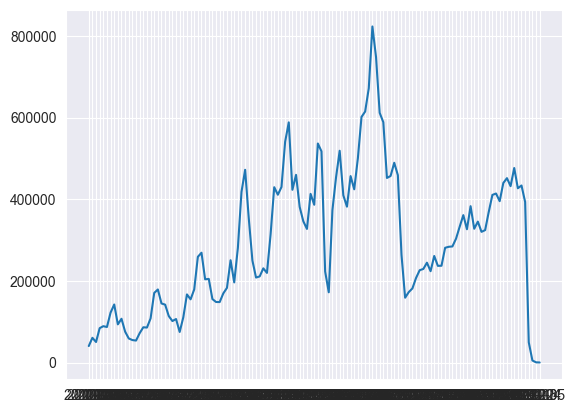

In [34]:
plt.plot(df_china['기준년월'],df_china['관광'])
plt.show()

In [35]:
for i in range(2010,2021):
    print(f'{i}-01')

2010-01
2011-01
2012-01
2013-01
2014-01
2015-01
2016-01
2017-01
2018-01
2019-01
2020-01


In [36]:
# list
var1 = [f'{i}-01' for i in range(2010,2021)]

In [37]:
import warnings
warnings.filterwarnings("ignore")


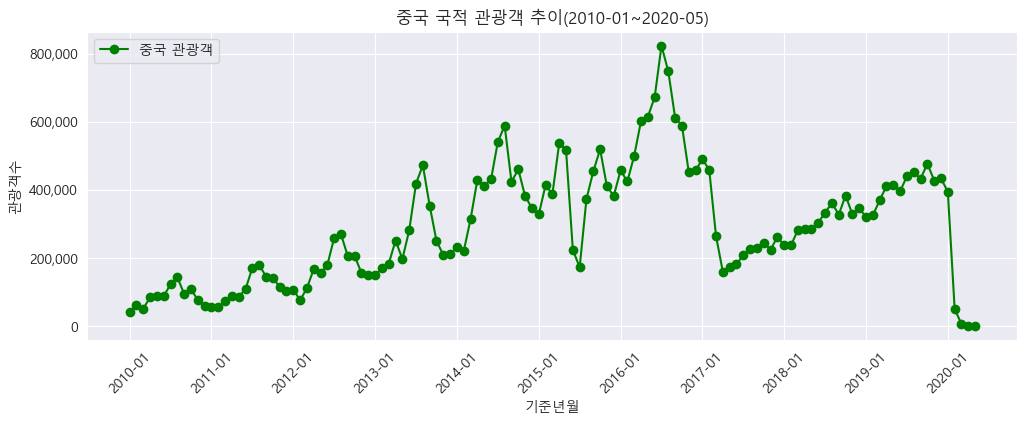

In [49]:
# 차트 크기 조절
plt.figure(figsize=(12,4))
# 그래프 내용
plt.plot(df_china['기준년월'],df_china['관광'],label = '중국 관광객', color = 'g', marker = 'o')
# 그래프 이름달기
plt.title('중국 국적 관광객 추이(2010-01~2020-05)')
plt.xlabel('기준년월')
plt.ylabel('관광객수')
plt.legend(loc='upper left')
# x 축 눈금 값 설정
plt.xticks(var1,rotation=45)
# y 축 라벨 (1000단위마다 쉼표)
plt.gca().set_yticklabels([f'{x:,.0f}'for x in plt.gca().get_yticks()])

plt.show()

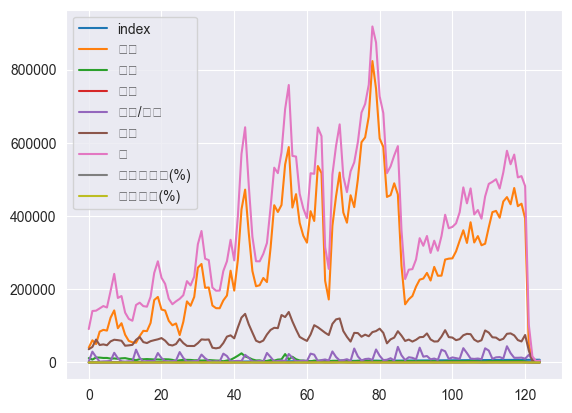

In [39]:
## 판다스 DF 을 자동으로 차트 만들어주는 것
df_china.plot()
plt.show()